# Fundamentos da Neuropedagogia Computacional
    This file is part of program Activ Spyder
    Copyright © 2022 Carlo Oliveira carlo@nce.ufrj.br,
    Labase <http://labase.selfip.org/>; GPL <http://is.gd/3Udt>.
    SPDX-License-Identifier: (GPLv3-or-later AND LGPL-2.0-only) WITH bison-exception

## Análise dos dados do documento de especificação -
    Inpeciona e gera estatísticas sobre o texto de especificação.
[!NOTE]
codeauthor:: Carlo Oliveira [carlo at ufrj](mailto:carlo@ufrj.br)

## Changelog

<!--![version added](https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/solid/circle-plus.svg)  22.06-->
<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/solid/circle-plus.svg" width=16/>  22.08

* Criação do raspador de página.
## Obtendo os dados do Github
O arquivo de especificação é guardado na página [Conteúdo Processo](https://activufrj.nce.ufrj.br/wiki/NEUROPEDAGOGIA_COMPUTACIONAL_CONTEUDO_PROCESSO/Relatorio_1). Este arquivo foi Produzido pelos pesquisadores para especificar a área.

In [26]:
STOPWORDS = "https://gitlab.com/cetoli/spike/-/raw/master/src/neurocomp/conf/stopwords.txt"
ESPECIFICA = "http://activufrj.nce.ufrj.br/raw/wiki/NEUROPEDAGOGIA_COMPUTACIONAL_CONTEUDO_PROCESSO/Relatorio_01"
"""Remove as stopwords da especificação"""
from urllib.request import urlopen
from collections import Counter
class Text:
    TEXT = None
    def __int__(self):
        Text.TEXT = self if not Text.TEXT else Text.TEXT
        self.original = None
        self.clean = None


with urlopen(ESPECIFICA) as response, urlopen(STOPWORDS) as stopword :
    tx = Text()
    Text.TEXT = tx
    body = response.read().lower().decode('utf-8')
    stop = stopword.read().decode('utf-8').split()
    list_body = body.split()
    print(list_body[:40])
    # clean = [u"{}".format(word) for word in list_body if word not in stop]
    clean = [word for word in list_body if (word not in stop)
             and ("\xa0" not in word) and ("<" not in word) and (word.isalpha())]
    print(clean[:40])
    tx.clean = count = Counter(clean)
    tup = list(count.items())
    tup.sort(key = lambda x: x[1], reverse=True)
    print(tup[:40])

['<html><body><p>1.', 'introdução</p>', '<p>enquanto', 'a', 'memorização', 'mecânica', 'permanece', 'como', 'forma', 'dominante', 'de', 'aprendizagem', 'em', 'muitas', 'salas', 'de', 'aula,', 'há', 'um', 'reconhecimento', 'crescente', 'de', 'que', 'a', 'finalidade', 'central', 'da', 'educação', 'deve', 'ser', 'valorizar', 'as', 'pessoas', 'para', 'que', 'se', 'encarregarem,', 'elas', 'próprias,', 'da']
['memorização', 'mecânica', 'permanece', 'forma', 'dominante', 'aprendizagem', 'muitas', 'salas', 'reconhecimento', 'crescente', 'finalidade', 'central', 'educação', 'deve', 'valorizar', 'pessoas', 'construção', 'significado', 'experiências', 'imperioso', 'cada', 'aprenda', 'aprender', 'ferramentas', 'adequadas', 'facilitar', 'ramificações', 'advêm', 'aprender', 'compreender', 'natureza', 'conhecimento', 'natureza', 'aprendizagem', 'valorizam', 'indivíduo', 'eficiente', 'aquisição', 'produção', 'contribuem']
[('processos', 9), ('conhecimento', 8), ('teoria', 8), ('modelagem', 8), ('metac

# Varredura do texto

O texto será percorrido usando uma janela de pertinência centrada em cada palavra

In [55]:
class SurveyText:
    def __init__(self, text_dictionary, relevancy=2):
        def strip(w):
            return w[:-1] if w.endswith("s") else w
        self.text = text_dictionary
        self.relevant = [strip(word) for word, cnt in self.text.items() if cnt >= relevancy]
        self.pairs = {}

    def survey(self, window=10):
        size = len(self.relevant)
        for here, word in enumerate(self.relevant):
            start = here - window if here >= window else 0
            ender = here + window if here+window <= size else size
            for other in self.relevant[start:ender]:
                if other == word:
                    continue
                entry = (other, word) if other < word else (word, other)
                self.pairs[entry] = self.pairs.setdefault(entry, 0) + 1

    def nodes(self, relevancy=2):
        node = {name[0]: good for name, good in self.pairs.items() if good>relevancy}
        node.update({name[1]: good for name, good in self.pairs.items() if good>relevancy})
        return node.keys()

    def show(self, relevancy=2):
        tuple_list = list(self.pairs.items())
        tuple_list.sort(key = lambda x: x[1], reverse=True)
        _list = [(_tuple[0], _tuple[1], good) for _tuple, good in tuple_list if good>relevancy]
        return _list


st = SurveyText(Text.TEXT.clean)
st.survey(20)
print(st.show()[:200])
print(st.nodes())

[('modelo', 'processo', 8), ('estratégia', 'modelo', 7), ('estratégia', 'processo', 6), ('conhecimento', 'árvore', 5), ('forma', 'significado', 4), ('conhecimento', 'forma', 4), ('forma', 'própria', 4), ('aprendizagem', 'conhecimento', 4), ('conhecimento', 'educação', 4), ('conhecimento', 'significado', 4), ('própria', 'significado', 4), ('conhecimento', 'experiência', 4), ('aprender', 'conhecimento', 4), ('conhecimento', 'ferramenta', 4), ('conhecimento', 'natureza', 4), ('conhecimento', 'indivíduo', 4), ('aquisição', 'conhecimento', 4), ('conhecimento', 'própria', 4), ('conhecimento', 'documento', 4), ('computacional', 'conhecimento', 4), ('conhecimento', 'escola', 4), ('conhecimento', 'tempo', 4), ('conhecimento', 'teoria', 4), ('conhecimento', 'relação', 4), ('conhecimento', 'estudo', 4), ('conhecimento', 'relacionado', 4), ('conhecimento', 'neuropedagogia', 4), ('conhecimento', 'pesquisa', 4), ('conhecimento', 'princípio', 4), ('conhecimento', 'modelagem', 4), ('conhecimento', 'ma

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


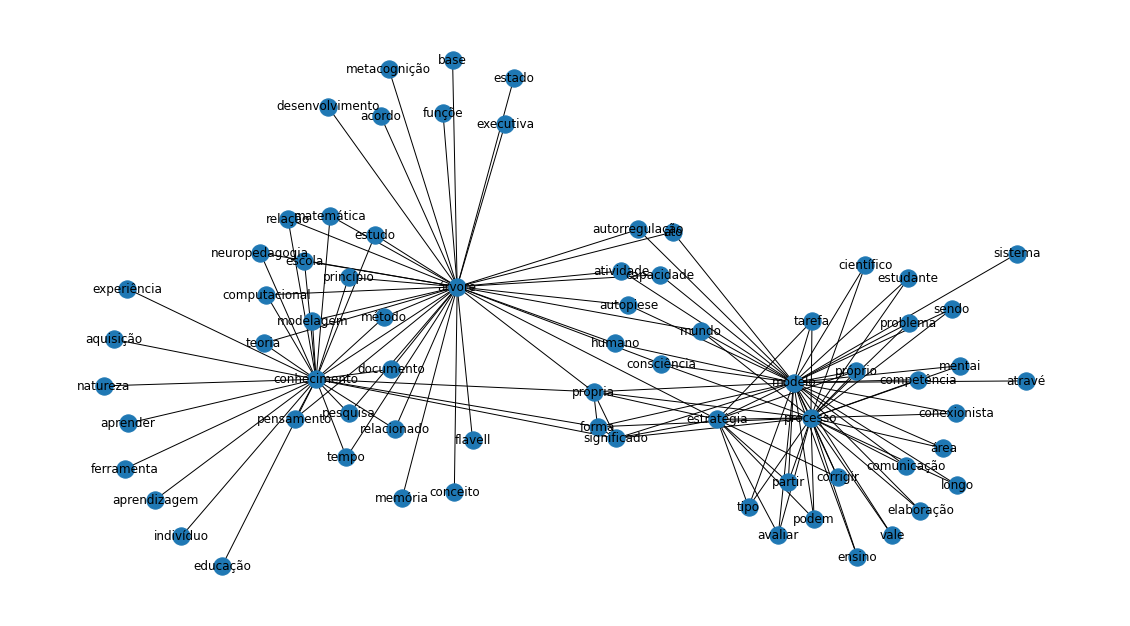

In [63]:
import networkx as nx  # importing networkx package
import matplotlib.pyplot as plt # importing matplotlib package and pyplot is for displaying the graph on canvas
colors = {wg: cl for wg, cl in enumerate("yycmbgrrrrr")}
plt.rcParams["figure.figsize"] = [15.50, 8.50]
plt.rcParams["figure.autolayout"] = True
wg=nx.Graph()
_ = [wg.add_node(node) for node in st.nodes()]
_ = [wg.add_edge(a, b,color=colors[w], weight=w ) for a, b, w in st.show()]

'''Node can be called by any python-hashable obj like string,number etc'''
nx.draw(wg, with_labels = True, )  #draws the networkx graph containing nodes which are declared till before
plt.show()  # displays the networkx graph on matplotlib canvas
